In [1]:
%pwd

'/home/italo/dev/ML/Incubator/incubator/notebooks'

In [2]:
import pandas as pd
import numpy as np
from pathlib import Path

In [6]:
DATA_PATH = Path('../data')
DEV_PATH = DATA_PATH / 'dev'

dev = pd.read_csv(DEV_PATH / 'metadata.csv')

In [7]:
dev.Sentiment.value_counts(normalize=True)

neutral     0.423805
negative    0.366096
positive    0.210099
Name: Sentiment, dtype: float64

In [8]:
dev.to_clipboard(sep=',')

In [9]:
dev.Emotion.value_counts(normalize=True)

neutral     0.423805
joy         0.146979
anger       0.137962
surprise    0.135257
sadness     0.100090
fear        0.036069
disgust     0.019838
Name: Emotion, dtype: float64

In [22]:
dev.head()

,Sr No.,Utterance,Speaker,Emotion,Sentiment,Dialogue_ID,Utterance_ID,Season,Episode,StartTime,EndTime
0,1,"Oh my God, hes lost it. Hes totally lost it.",Phoebe,sadness,negative,0,0,4,7,"00:20:57,256","00:21:00,049"
1,2,What?,Monica,surprise,negative,0,1,4,7,"00:21:01,927","00:21:03,261"
2,3,"Or! Or, we could go to the bank, close our acc...",Ross,neutral,neutral,1,0,4,4,"00:12:24,660","00:12:30,915"
3,4,Youre a genius!,Chandler,joy,positive,1,1,4,4,"00:12:32,334","00:12:33,960"
4,5,"Aww, man, now we wont be bank buddies!",Joey,sadness,negative,1,2,4,4,"00:12:34,211","00:12:37,505"


In [23]:
# Replace the Unicode characters with their appropriate replacements
dev['Utterance'] = (
    dev.Utterance.apply(lambda s: s.replace('\x92', "'"))
        .apply(lambda s: s.replace('\x85', ". "))
        .apply(lambda s: s.replace('\x97', " "))
        .apply(lambda s: s.replace('\x91', ""))
        .apply(lambda s: s.replace('\x93', ""))
        .apply(lambda s: s.replace('\xa0', ""))
        .apply(lambda s: s.replace('\x94', ""))
)


In [24]:
from spacy.lang.en import English
nlp = English()
# Create a Tokenizer with the default settings for English
# including punctuation rules and exceptions
tokeniser = nlp.Defaults.create_tokenizer(nlp)

In [25]:
dev['Tokens'] = dev.Utterance.apply(lambda s: tokeniser(s))
dev['NTokens'] = dev.Tokens.apply(len)

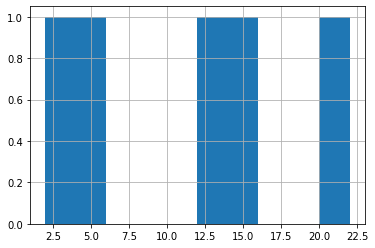

In [26]:
dev.NTokens.hist()

In [27]:
dev.loc[dev.NTokens == 2, ['Utterance', 'Tokens']]

,Utterance,Tokens
1,What?,"(What, ?)"


In [28]:
dev.NTokens.describe()

count     5.000000
mean     11.200000
std       7.981228
min       2.000000
25%       5.000000
50%      12.000000
75%      15.000000
max      22.000000
Name: NTokens, dtype: float64

In [29]:
dev.NTokens.value_counts(normalize=True)

15    0.2
22    0.2
5     0.2
12    0.2
2     0.2
Name: NTokens, dtype: float64

In [30]:
dev.NTokens.value_counts()

15    1
22    1
5     1
12    1
2     1
Name: NTokens, dtype: int64

In [31]:
dev.head()

,Sr No.,Utterance,Speaker,Emotion,Sentiment,Dialogue_ID,Utterance_ID,Season,Episode,StartTime,EndTime,Tokens,NTokens
0,1,"Oh my God, he's lost it. He's totally lost it.",Phoebe,sadness,negative,0,0,4,7,"00:20:57,256","00:21:00,049","(Oh, my, God, ,, he, 's, lost, it, ., He, 's, ...",15
1,2,What?,Monica,surprise,negative,0,1,4,7,"00:21:01,927","00:21:03,261","(What, ?)",2
2,3,"Or! Or, we could go to the bank, close our acc...",Ross,neutral,neutral,1,0,4,4,"00:12:24,660","00:12:30,915","(Or, !, Or, ,, we, could, go, to, the, bank, ,...",22
3,4,You're a genius!,Chandler,joy,positive,1,1,4,4,"00:12:32,334","00:12:33,960","(You, 're, a, genius, !)",5
4,5,"Aww, man, now we won't be bank buddies!",Joey,sadness,negative,1,2,4,4,"00:12:34,211","00:12:37,505","(Aww, ,, man, ,, now, we, wo, n't, be, bank, b...",12


In [32]:
# Get only necessary columns for the text portion
data = dev.loc[:, ['Emotion', 'Sentiment', 'Dialogue_ID', 'Utterance_ID', 'Tokens']]

In [33]:
# Remove punctuation
data.Tokens = data.Tokens.apply(lambda ts: tuple(filter(lambda t: not t.is_punct,ts)))

In [34]:
# We're keeping the contractions
data.Tokens

0    (Oh, my, God, he, 's, lost, it, He, 's, totall...
1                                              (What,)
2    (Or, Or, we, could, go, to, the, bank, close, ...
3                                (You, 're, a, genius)
4      (Aww, man, now, we, wo, n't, be, bank, buddies)
Name: Tokens, dtype: object

In [38]:
data.to_clipboard(sep=',')

In [ ]:
,Emotion,Sentiment,Dialogue_ID,Utterance_ID,Tokens
0,sadness,negative,0,0,"(Oh, my, God, he, 's, lost, it, He, 's, totally, lost, it)"
1,surprise,negative,0,1,"(What,)"
2,neutral,neutral,1,0,"(Or, Or, we, could, go, to, the, bank, close, our, accounts, and, cut, them, off, at, the, source)"
3,joy,positive,1,1,"(You, 're, a, genius)"
4,sadness,negative,1,2,"(Aww, man, now, we, wo, n't, be, bank, buddies)"


In [40]:
data

,Emotion,Sentiment,Dialogue_ID,Utterance_ID,Tokens
0,sadness,negative,0,0,"(Oh, my, God, he, 's, lost, it, He, 's, totall..."
1,surprise,negative,0,1,"(What,)"
2,neutral,neutral,1,0,"(Or, Or, we, could, go, to, the, bank, close, ..."
3,joy,positive,1,1,"(You, 're, a, genius)"
4,sadness,negative,1,2,"(Aww, man, now, we, wo, n't, be, bank, buddies)"
